In [1]:
#Imports
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Data paths
datadir = os.path.join(os.getcwd(), 'archive')

data_map = {
"customers" : os.path.join(datadir, 'olist_customers_dataset.csv'),
"geolocation" : os.path.join(datadir, 'olist_geolocation_dataset.csv'),
#Orders
"order_items" : os.path.join(datadir, 'olist_order_items_dataset.csv'),
"order_payments" : os.path.join(datadir, 'olist_order_payments_dataset.csv'),
"order_reviews" : os.path.join(datadir, 'olist_order_reviews_dataset.csv'),
# MAIN DATA
"orders" : os.path.join(datadir, 'olist_orders_dataset.csv'),
#Products
"products" : os.path.join(datadir, 'olist_products_dataset.csv'),
"sellers" : os.path.join(datadir, 'olist_sellers_dataset.csv'),
"prod2cat_translation" : os.path.join(datadir, 'product_category_name_translation.csv')
}

def load(df_name):
    return pd.read_csv(data_map[df_name])

In [2]:
products_df = load('products')
translate = load("prod2cat_translation")
print(f'Products: {products_df.shape}')
print(f'Translate: {translate.shape}')
products_df.head()

Products: (32951, 9)
Translate: (71, 2)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [3]:
translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


We can **translate** each of the product categories from Portugueuse to English.

def translate_catname(row):
    return translate.loc[translate.product_category_name == row.product_category_name]

In [4]:
prod_translated = products_df.merge(translate, on='product_category_name')
print(prod_translated.shape)
prod_translated.head()

(32328, 10)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [5]:
prod_translated['product_volume_cm3'] = prod_translated['product_length_cm'] *prod_translated['product_height_cm']*prod_translated['product_width_cm']
prod_translated['product_volume_cm3']   

0          2240.0
1          2700.0
2          6048.0
3          3757.0
4          3510.0
           ...   
32323     15625.0
32324     18081.0
32325    262800.0
32326     70000.0
32327     13125.0
Name: product_volume_cm3, Length: 32328, dtype: float64

In [6]:
cat_gby = prod_translated.groupby('product_category_name_english') #Group-by category
most_vol = cat_gby['product_volume_cm3'].mean().sort_values(ascending=False).head(n=10) #Products with most volume
most_weight = cat_gby['product_weight_g'].mean().sort_values(ascending=False).head(n=10) #products with most weight

# Bulkiest Products

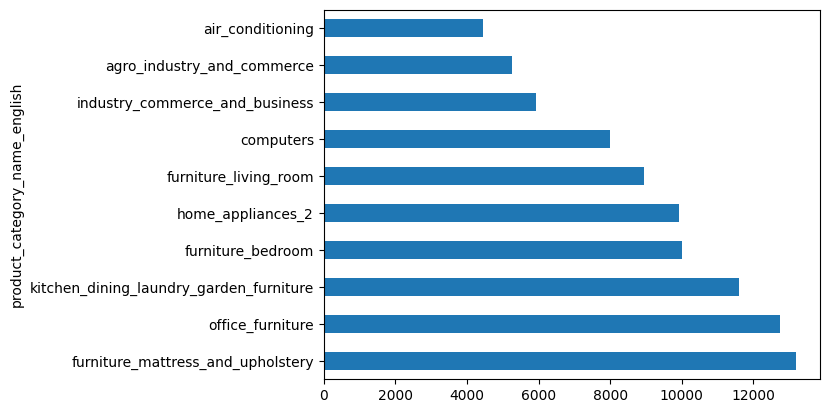

In [7]:
most_weight.plot.barh()
plt.show()

In [8]:
cat_gby['product_id'].count()

product_category_name_english
agro_industry_and_commerce      74
air_conditioning               124
art                             55
arts_and_craftmanship           19
audio                           58
                              ... 
stationery                     849
tablets_printing_image           9
telephony                     1134
toys                          1411
watches_gifts                 1329
Name: product_id, Length: 71, dtype: int64

# Weight/Volume/Category

In [9]:
#just retain features and possible response variable
sub_df = prod_translated[['product_weight_g','product_volume_cm3', 'product_category_name_english']]
sub_df.head()

,product_weight_g,product_volume_cm3,product_category_name_english
0,225.0,2240.0,perfumery
1,400.0,2700.0,perfumery
2,422.0,6048.0,perfumery
3,267.0,3757.0,perfumery
4,377.0,3510.0,perfumery


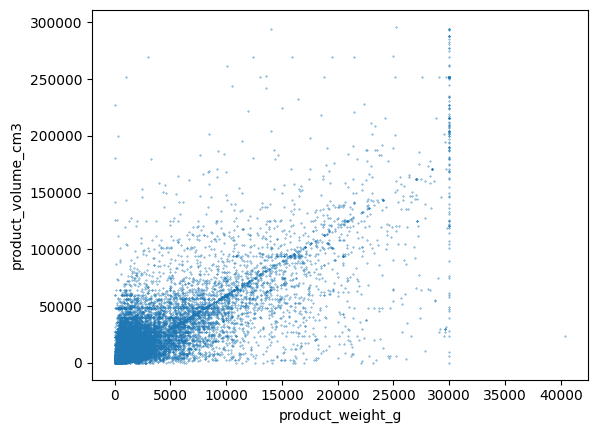

In [10]:
sub_df.plot.scatter(x = 'product_weight_g', y = 'product_volume_cm3', s=0.1)
plt.show()

# Merge with Orders

In [11]:
orderitems_df = load('order_items')
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
ord2prod = orderitems_df.merge(prod_translated, on='product_id')
ord2prod.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,product_volume_cm3
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3528.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3528.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3528.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3528.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,3528.0


In [13]:
ord2prod.shape

(111023, 17)

In [14]:
ord2prod.order_id.unique().size

97256

In [15]:
# Test case
ord2prod.groupby(['order_id', 'product_id']).get_group(('00143d0f86d6fbd9f9b38ab440ac16f5', 'e95ee6822b66ac6058e2e4aff656071a'))

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,product_volume_cm3
1315,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure,2618.0
1316,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure,2618.0
1317,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,esporte_lazer,52.0,1153.0,1.0,180.0,17.0,11.0,14.0,sports_leisure,2618.0


In [214]:
ord_stats = ord2prod.groupby(['order_id', 'product_id'])[[ 'product_weight_g','product_volume_cm3', 'price', 'freight_value',]].sum()
ord_stats

,,product_weight_g,product_volume_cm3,price,freight_value
order_id,product_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,650.0,3528.0,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,30000.0,60000.0,239.90,19.93
000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,3050.0,14157.0,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,200.0,2400.0,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,3750.0,42000.0,199.90,18.14
...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,10150.0,53400.0,299.99,43.41
fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,8950.0,44460.0,350.00,36.53
fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,967.0,9576.0,99.90,16.95


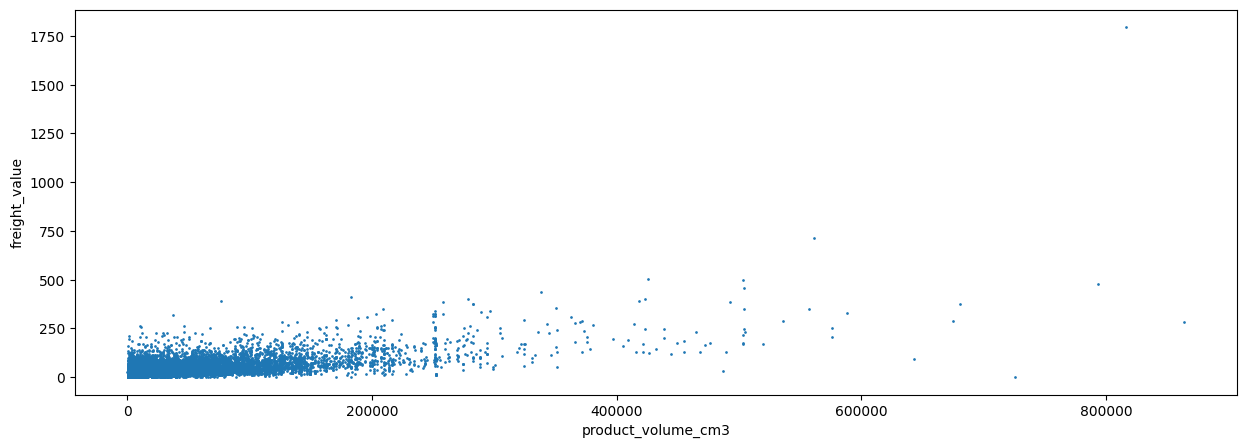

In [17]:
ord_stats.plot.scatter(x = 'product_volume_cm3', y = 'freight_value', figsize=(15,5), s=0.9)
plt.show()

# Freight Cost Predictor

In [18]:
'''
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
'''
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

data = ord_stats[['product_weight_g', 'product_volume_cm3', 'freight_value']]
scaler = StandardScaler()

X = data[['product_weight_g', 'product_volume_cm3']].values
y = data['freight_value'].values
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
print(f'X_train shape: {X_train.shape} \t X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape} \t y_test shape: {y_test.shape}')

#Standardize data
scaler.fit(X_train)
print(scaler.mean_)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

X shape: (100943, 2)
y shape: (100943,)
X_train shape: (95895, 2) 	 X_test shape: (5048, 2)
y_train shape: (95895,) 	 y_test shape: (5048,)
[ 2305.35911153 16799.74362584]


In [19]:
model = linear_model.LinearRegression()
# model = linear_model.Ridge()
# model = RandomForestRegressor(n_estimators = 1000 , max_depth=5, random_state=0, n_jobs=-1)
# model = MLPRegressor(random_state=1, max_iter=500)


model.fit(X_train, y_train)

yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

#Errors
errors = {}
errors['train_rmse'] = np.sqrt(mean_squared_error(y_train, yhat_train))
errors['test_rmse'] = np.sqrt(mean_squared_error(y_test, yhat_test))
errors['train_mae'] = mean_absolute_error(y_train, yhat_train)
errors['test_mae'] = mean_absolute_error(y_test, yhat_test)

errors

{'train_rmse': 14.828694639701165,
 'test_rmse': 25.02415191054664,
 'train_mae': 8.281302248196235,
 'test_mae': 8.673042135762547}

In [20]:
model.predict([[700.0, 3600.0]])

array([16.49247996])

# Daily Sales Prediction

In [21]:
orders_main = load('orders')
orders_main.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [22]:
#Contains all the available information (order times, product info)
orders_full = ord2prod.merge(orders_main, on = 'order_id')
orders_full.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_width_cm,product_category_name_english,product_volume_cm3,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,14.0,cool_stuff,3528.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,14.0,cool_stuff,3528.0,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,14.0,cool_stuff,3528.0,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,14.0,cool_stuff,3528.0,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,14.0,cool_stuff,3528.0,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00


In [23]:
orders_full['order_purchase_timestamp'] = pd.to_datetime(orders_full.order_purchase_timestamp)
df_ts = orders_full.set_index('order_purchase_timestamp').sort_index()
df_ts

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_height_cm,product_width_cm,product_category_name_english,product_volume_cm3,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,,,,,,,,,,,,,,,
2016-09-04 21:15:19,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,moveis_decoracao,41.0,754.0,...,6.0,28.0,furniture_decor,5376.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
2016-09-04 21:15:19,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,moveis_decoracao,59.0,426.0,...,6.0,28.0,furniture_decor,5376.0,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
2016-09-05 00:15:34,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56,telefonia,42.0,381.0,...,2.0,25.0,telephony,1250.0,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00
2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,...,16.0,16.0,health_beauty,4096.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,beleza_saude,34.0,1036.0,...,16.0,16.0,health_beauty,4096.0,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-29 14:18:23,0b223d92c27432930dfe407c6aea3041,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,moveis_cozinha_area_de_servico_jantar_e_jardim,44.0,112.0,...,49.0,49.0,kitchen_dining_laundry_garden_furniture,115248.0,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04 00:00:00
2018-08-29 14:18:28,168626408cb32af0ffaf76711caae1dc,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-08-31 14:30:23,45.90,15.39,beleza_saude,26.0,394.0,...,16.0,28.0,health_beauty,13888.0,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11 00:00:00
2018-08-29 14:52:00,03ef5dedbe7492bdae72eec50764c43f,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,2018-08-31 15:05:22,24.90,8.33,artigos_de_festas,54.0,429.0,...,9.0,19.0,party_supplies,4788.0,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03 00:00:00


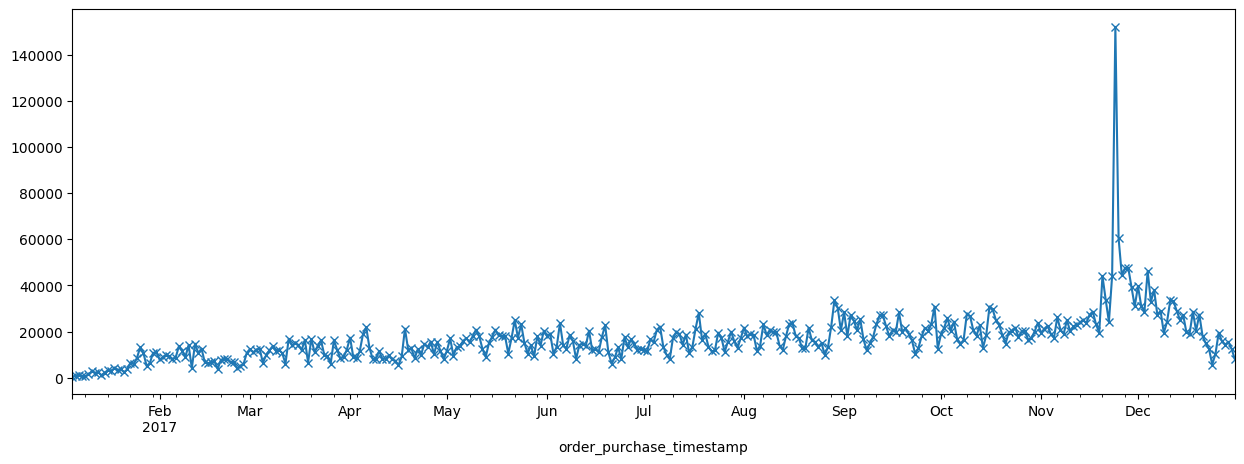

In [24]:
df_ts.loc['2017'].resample('D')['price'].sum().plot(figsize=(15,5), marker='x')
plt.show()

In [25]:
df_ts.loc['2017'].resample('30min').sum()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
order_purchase_timestamp,,,,,,,,,,,
2017-01-05 11:30:00,1,10.90,8.72,64.0,1710.0,1.0,200.0,16.0,2.0,11.0,352.0
2017-01-05 12:00:00,5,42.50,43.60,281.0,6020.0,5.0,1000.0,80.0,10.0,55.0,1760.0
2017-01-05 12:30:00,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-05 13:00:00,2,22.80,17.44,111.0,3727.0,3.0,400.0,32.0,4.0,22.0,704.0
2017-01-05 13:30:00,10,100.00,87.20,578.0,18364.0,10.0,1900.0,160.0,20.0,110.0,3520.0
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 21:00:00,3,189.79,66.51,144.0,1997.0,9.0,8025.0,74.0,76.0,59.0,47840.0
2017-12-31 21:30:00,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-31 22:00:00,1,219.90,18.79,42.0,236.0,1.0,342.0,18.0,13.0,15.0,3510.0


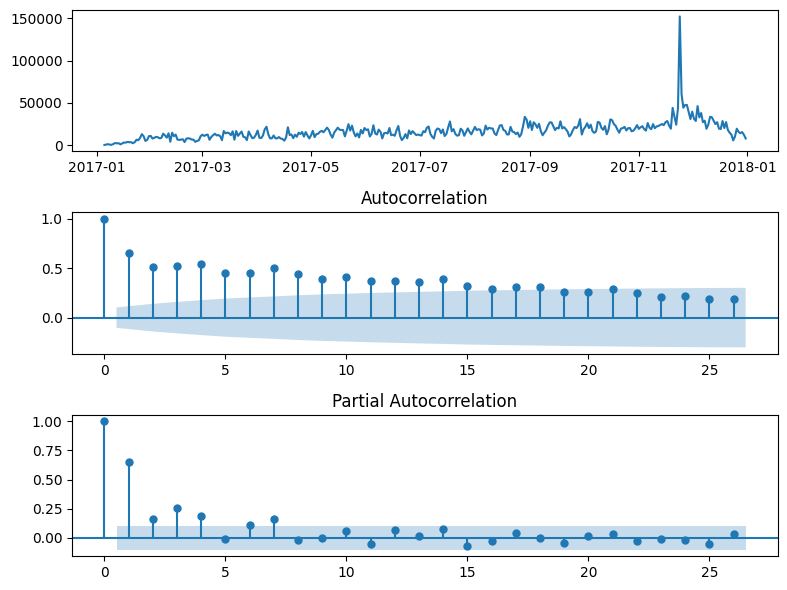

In [165]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, (a1, a2, a3) = plt.subplots(3, 1, figsize=(8,6))
series_17 = df_ts.loc['2017'].resample('d')['price'].sum()
# series_18 = df_ts.loc['2018'].resample('d')['price'].sum()
series = pd.concat([series_17,])
a1.plot(series)
plot_acf(series, ax=a2)
plot_pacf(series, ax=a3)
plt.tight_layout()
plt.show()

In [206]:
#create a train-test split
test_size = 5 #in days
xt_train = series[:-test_size]
xt_test = series[-test_size:]
print(f'Train data shape: {xt_train.shape}')
print(f'Test data shape: {xt_test.shape}')
assert len(xt_train) + len(xt_test) == len(series)

Train data shape: (356,)
Test data shape: (5,)


In [207]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
#https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html#ARIMA-Postestimation:-Example-1---Dynamic-Forecasting

# ar1 = ARIMA(xt_train, order= (1,0, 0))
models = {
    'AR1': SARIMAX(xt_train, order= (1, 0, 0 )),
    'MA1':SARIMAX(xt_train, order= (0, 0, 1 )),
    'ARMA11':SARIMAX(xt_train, order= (1, 0, 1 ))
}

model = models['AR1']
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                  356
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3748.611
Date:                Mon, 11 Apr 2022   AIC                           7501.222
Time:                        11:48:52   BIC                           7508.972
Sample:                    01-05-2017   HQIC                          7504.305
                         - 12-26-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8928      0.006    138.262      0.000       0.880       0.906
sigma2      8.182e+07   1.01e-13   8.11e+20      0.000    8.18e+07    8.18e+07
===================================================================================
Ljung-Box (Q):                      108.88   Jarque-Bera (JB):            103059.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              12.26   Skew:                             3.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        86.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [208]:
predict = res.get_prediction()
predict_ci = predict.conf_int()

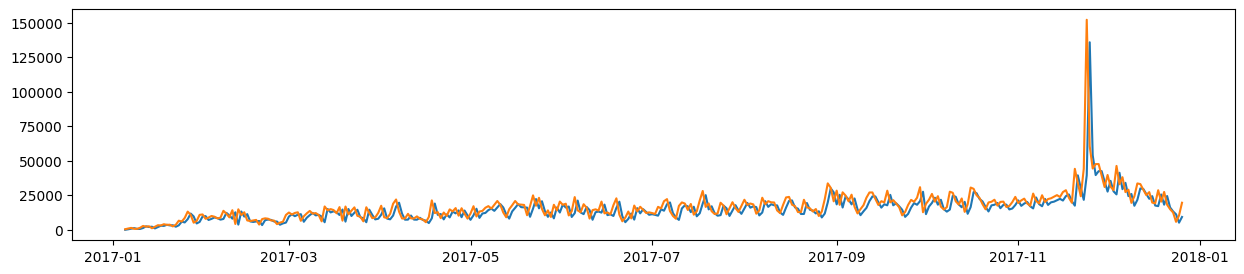

In [209]:
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(predict.predicted_mean)
ax.plot(xt_train)
plt.show()

In [210]:
forecasts = res.get_forecast(steps=len(xt_test)).summary_frame()
forecasts.head()

price,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-12-27,17483.801787,9045.439429,-244.933719,35212.537293
2017-12-28,15610.352364,12126.203514,-8156.569792,39377.274520
2017-12-29,13937.649483,14108.168572,-13713.852806,41589.151772
2017-12-30,12444.182461,15507.740625,-17950.430646,42838.795569
2017-12-31,11110.745562,16538.821081,-21304.748105,43526.239228


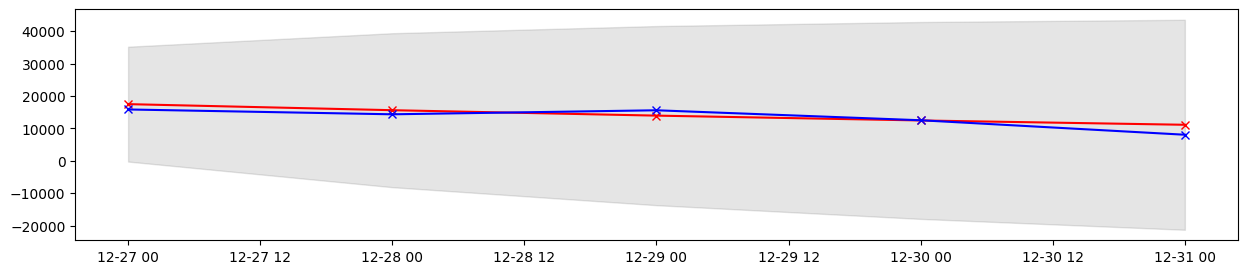

In [211]:
#https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html
fig, ax = plt.subplots(figsize=(15,3))

ax.plot(forecasts['mean'], color='red', marker = 'x')
ax.fill_between(forecasts.index, forecasts['mean_ci_lower'], forecasts['mean_ci_upper'], color='k', alpha=0.1)
ax.plot(xt_test, color='blue', marker = 'x')
plt.show()

In [212]:
rmse = np.sqrt(mean_squared_error(xt_test, forecasts['mean'].values))
rmse

1815.5959339398564